# Classifying Chips as Defective or Non-Defective

* We are given a set of images or chips and labels , which states if the chips are defective or not
* I try to classify these images using CNN
* First we directly use the data in raw form 
* Secondly we use data generator to generator hoping to get improved results.

In [81]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Analyzing Dataset

In [3]:
next(os.walk('/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train'))

('/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train',
 ['Non-Defective', 'Defective'],
 ['desktop.ini'])

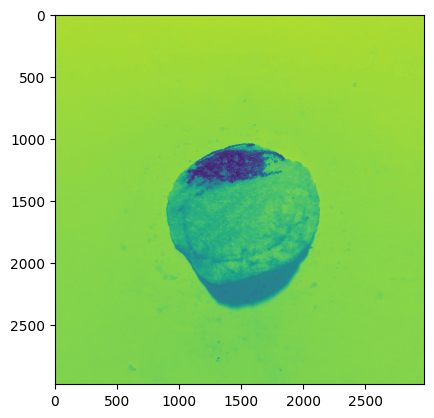

In [4]:
path = '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train/Defective/IMG_20210319_010440.jpg'
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()

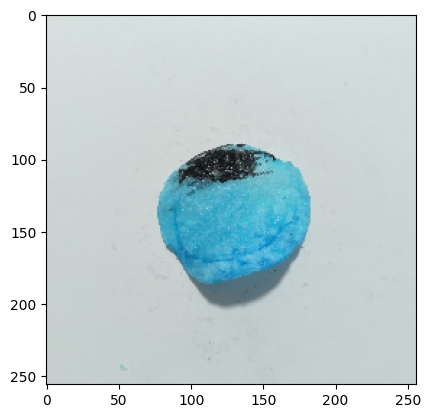

In [5]:
img = cv2.imread(path,cv2.IMREAD_COLOR )
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.show()

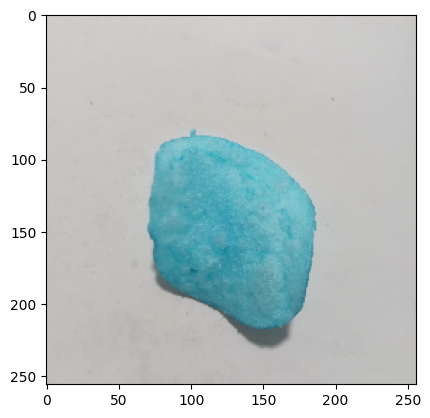

In [6]:
path = '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train/Non-Defective/IMG_20210318_232929.jpg'
img = cv2.imread(path,cv2.IMREAD_COLOR )
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.show()

## Extracting all the data along with the labels

### Doing for both training and testing data.

In [25]:
images = []
labels = []

folders = next(os.walk('/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train'))[1]
path = '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train'
for folder in folders:
#     print(os.path.join(path,folder))
    image_names = next(os.walk(os.path.join(path,folder)))[2]
    print(len(image_names))
    curr_class = -1
    if(folder=="Non-Defective"):
        curr_class = 1
    else:
        curr_class = 0
        
    for image_name in image_names:
        image_path = os.path.join(path,folder,image_name)
        try:
            img = cv2.imread(image_path,cv2.IMREAD_COLOR)
            img = cv2.resize(img,(96,96))
            images.append(img)
            labels.append(curr_class)
        except:
            print(image_path)

401
/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train/Non-Defective/desktop.ini
370
/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train/Defective/desktop.ini


In [26]:
print(len(images))

769


In [27]:
print(len(labels))

769


In [28]:
print(labels[0])

1


### preparing testing data

In [29]:
test_images = []
test_labels = []

folders = next(os.walk('/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Test'))[1]
path = '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Test'
for folder in folders:
#     print(os.path.join(path,folder))
    image_names = next(os.walk(os.path.join(path,folder)))[2]
    print(len(image_names))
    curr_class = -1
    if(folder=="Non-Defective"):
        curr_class = 1
    else:
        curr_class = 0
        
    for image_name in image_names:
        image_path = os.path.join(path,folder,image_name)
        try:
            img = cv2.imread(image_path,cv2.IMREAD_COLOR)
            img = cv2.resize(img,(96,96))
            test_images.append(img)
            test_labels.append(curr_class)
        except:
            print(image_path)

101
/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Test/Not Defective/desktop.ini
93
/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Test/Defective/desktop.ini


In [31]:
labels = np.array(labels)
print("training labels done")
labels

training labels done


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [32]:
images = np.array(images)/255.0
print("training done")

training done


In [33]:
test_images = np.array(test_images)/255.0
test_labels = np.array(test_labels)
print("testing done")

testing done


In [64]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from sklearn.metrics import classification_report, confusion_matrix

## Building the Model

In [65]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 45, 45, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 20, 20, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,676,993 (17.84 MB)

 Trainable params: 4,676,993 (17.84 MB)

 Non-trainable params: 0 (0.00 B)

### Defining Callbacks

In [66]:
checkpointer=ModelCheckpoint(
    'saved_models/rainedModelOnAllData.keras',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
)

In [67]:
es=EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=10,restore_best_weights=True)

In [68]:
hist = model.fit(images, 
                 labels, 
                 validation_data=(test_images, test_labels), 
                 batch_size=16, 
                 epochs=20,
                 callbacks=[checkpointer, es]
                )

Epoch 1/20
16/49 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4775 - loss: 0.8887

W0000 00:00:1719433445.701368     229 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5016 - loss: 0.7890
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to saved_models/rainedModelOnAllData.keras


W0000 00:00:1719433450.541163     231 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - accuracy: 0.5018 - loss: 0.7876 - val_accuracy: 0.0000e+00 - val_loss: 0.6974
Epoch 2/20
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6774 - loss: 0.6100
Epoch 2: val_accuracy improved from 0.00000 to 0.34896, saving model to saved_models/rainedModelOnAllData.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6842 - loss: 0.6040 - val_accuracy: 0.3490 - val_loss: 1.4421
Epoch 3/20
43/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9672 - loss: 0.1525
Epoch 3: val_accuracy did not improve from 0.34896
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9674 - loss: 0.1514 - val_accuracy: 0.3333 - val_loss: 1.2479
Epoch 4/20
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9291 - loss: 0.2188
Epoch 4: val_accuracy improved from 0.34896 to 0.45312, saving model to saved_models/rainedModelOnAllData.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9310 - loss: 0.2140 - val_accuracy: 0.4531 - val_loss: 1.3114
Epo

Max Accuracy :  0.5052083134651184


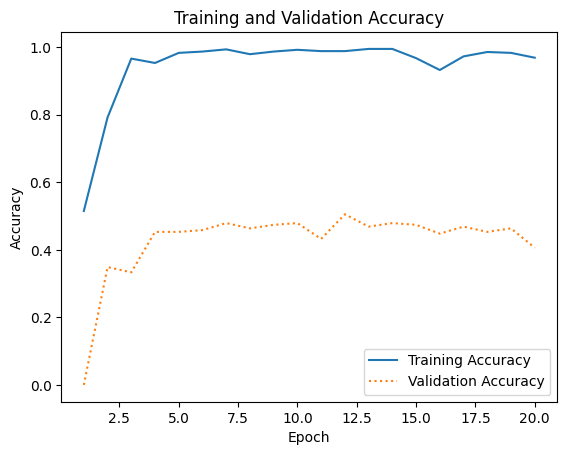

In [69]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

print("Max Accuracy : ",np.max(val_acc))

[]

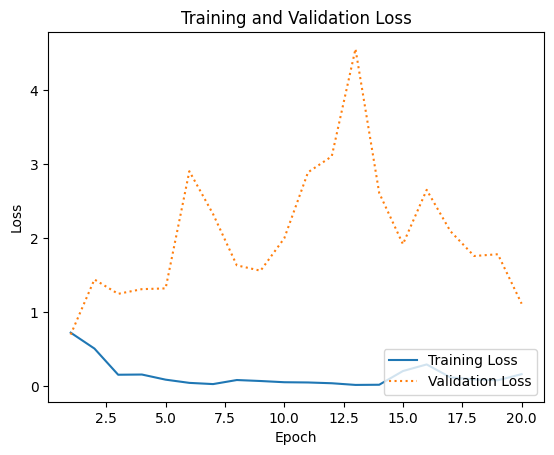

In [70]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training Loss')
plt.plot(epochs, val_loss, ':', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.plot()

## We can See that simply training on given images is not giving a good result 
* So let's try to apply some data augmentation to make the model more robust as it is performing good on training data .

In [71]:
path_main = "/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset"
train_dir =  os.path.join(path_main,"Train")
test_dir = os.path.join(path_main,"Test")

In [73]:
for dirpath, dirnames, filenames in os.walk(path_main):
    print(f"{len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

2 directories and 0 images in '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset'
2 directories and 1 images in '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Test'
0 directories and 101 images in '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Test/Not Defective'
0 directories and 93 images in '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Test/Defective'
2 directories and 1 images in '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train'
0 directories and 401 images in '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train/Non-Defective'
0 directories and 370 images in '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train/Defective'


In [74]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32

train_datagen = IDG(rescale=1./255, validation_split=0.2)
test_datagen = IDG(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=IMAGE_SIZE,
                                               class_mode="binary",
                                               subset="training",
                                               shuffle=True,
                                               seed=40)

valid_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=IMAGE_SIZE,
                                               class_mode="binary",
                                               subset="validation",
                                               shuffle=True,
                                               seed=40)


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=IMAGE_SIZE,
                                               class_mode="binary",
                                               shuffle=False,
                                               seed=40)


Found 616 images belonging to 2 classes.
Found 153 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


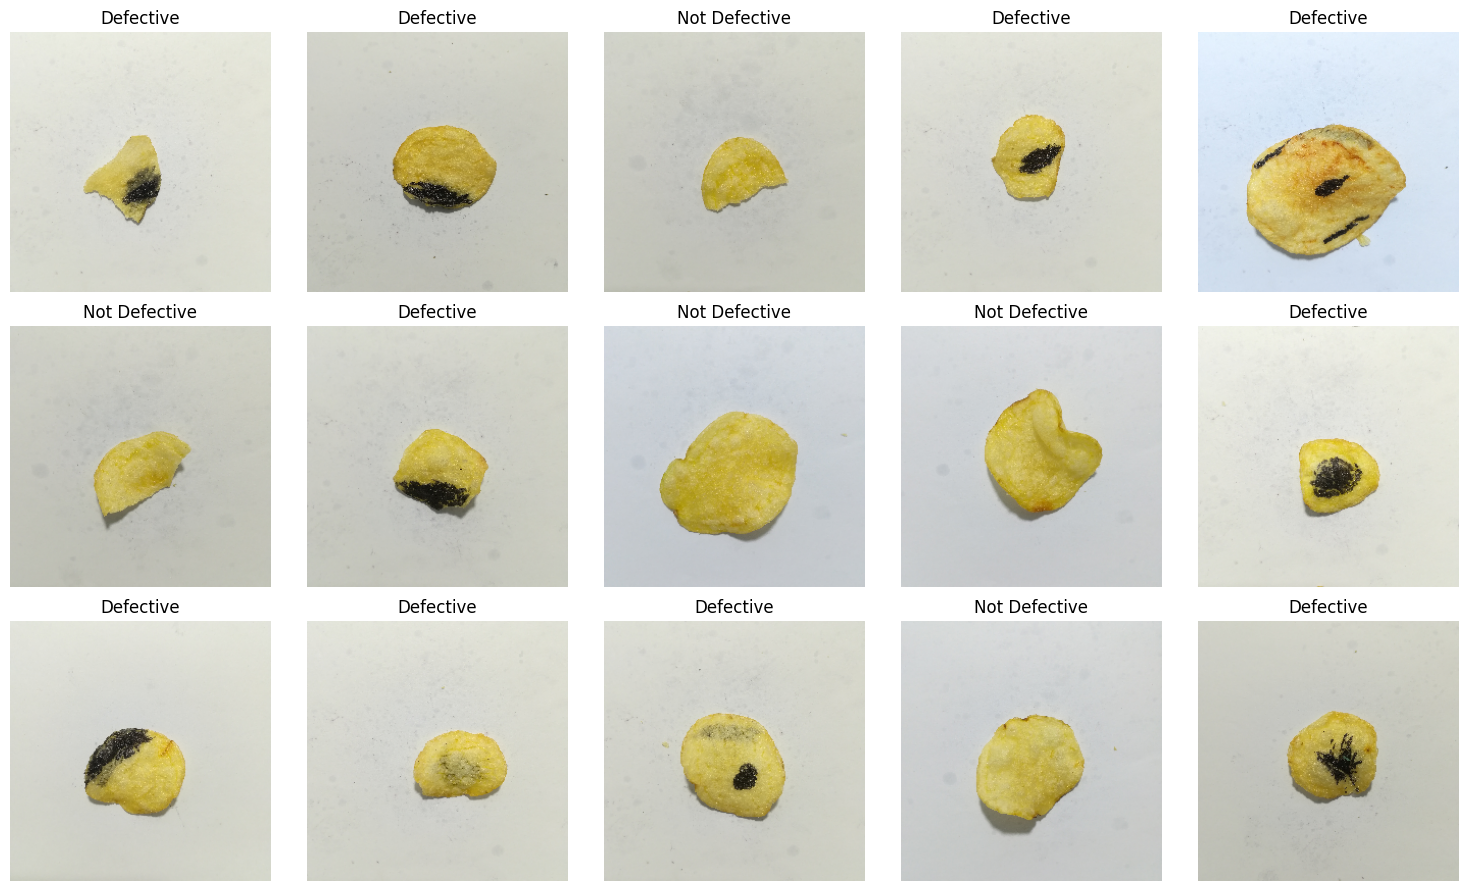

In [77]:
plt.figure(figsize=(15,9))

for i in range(15):
    axs = plt.subplot(3,5,i+1)
    x, y = next(train_data)
    plt.imshow(x[i])
    plt.axis('off')
    axs.set_title("Defective" if y[i] == 0 else "Not Defective")
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    plt.subplots_adjust(wspace=None, hspace=None)
plt.tight_layout()

In [79]:
model_name = "modelOnAugmentedData.keras"
checkpoint = ModelCheckpoint(model_name,
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=0)
earlystopping = EarlyStopping(monitor='val_loss',
                              min_delta=0, 
                              patience=3, 
                              verbose=1,
                              restore_best_weights=True)

In [96]:
tf.random.set_seed(40)

model1 = Sequential()
model1.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256,256,3)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(Conv2D(16, (3, 3), activation='relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])

model1.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 252, 252, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 124, 124, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 122, 122, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 61, 61, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 59536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │        59,537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,345 (474.00 KB)

 Trainable params: 121,345 (474.00 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
history_1 = model1.fit(train_data,
            epochs=10,
            validation_data=valid_data,
            batch_size = 32,
            callbacks=[checkpoint, earlystopping])

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9570 - loss: 0.1942 - val_accuracy: 0.9869 - val_loss: 0.1237
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9851 - loss: 0.0803 - val_accuracy: 0.9477 - val_loss: 0.1284
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9473 - loss: 0.1838 - val_accuracy: 0.9804 - val_loss: 0.0620
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


In [100]:
def plot_curves(history):

    """
    Returns separate loss and accuracy curves
    """

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()


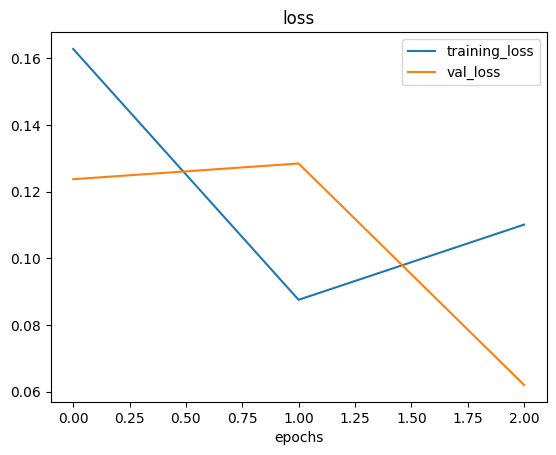

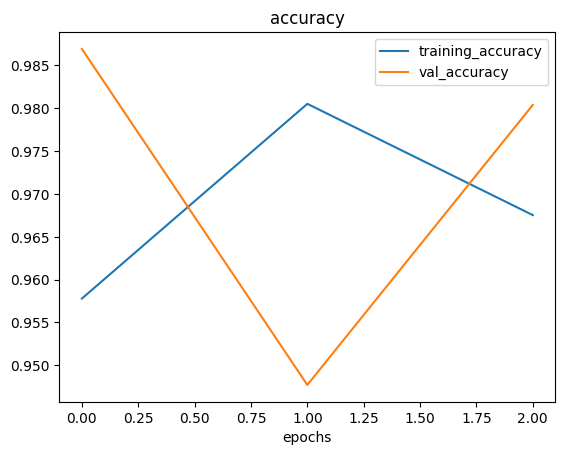

In [101]:
plot_curves(history_1)

In [103]:
result = model1.evaluate(test_data, verbose=0)
print(result)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

[0.13614585995674133, 0.9635416865348816]
Accuracy on Evaluation: 96.35%
Loss: 0.1361


In [104]:
y_true = test_data.labels
y_pred = model1.predict(test_data, verbose=0)
y_pred[y_pred < 0.5] = 0
y_pred[y_pred >= 0.5] = 1

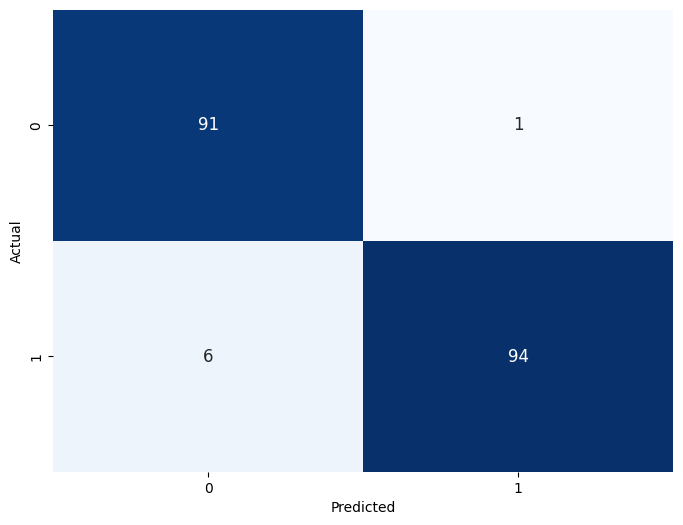

In [105]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true,y_pred), cbar=False, annot=True, annot_kws={"fontsize":12}, fmt='.3g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Conclusion

* We can see the massive difference between the two approaches .
* Validation Accuracy by First Approach = 0.50
* Validation Accuracy by Second Approach = 0.98 , which is much better

### Future
* We can build a machine which uses this model and seprates the chips using some method.